https://chatgpt.com/share/68703dc5-4ff0-8008-9153-42348685b941

In [3]:
import gspread
import pandas as pd
import re
from gspread_dataframe import get_as_dataframe
from collections import defaultdict
import time
import matplotlib.pyplot as plt

In [4]:
CREDENTIALS_JSON = '../rm4mt-463314-3ce1280ee29c.json'
sheet_urls = [
    "https://docs.google.com/spreadsheets/d/1yhLFAwm-sFAG2cDxDBQ6C0smcM_f5uQxYuy_clvgueM/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/19sowSDpBO42OSXFeBM92UBp1H2MZkQQWzEAPMpZz9q4/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/16nVSzWScuuYThX2ZgQAyZ0V5ip5d1GFPKCABjG6IHf8/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/1k_zR5v7em_iz1J3K6p4qRYvFrzbFDOjI8lLWtPK3YCM/edit?usp=sharing",
]
sheet_urls_wait = [
    "https://docs.google.com/spreadsheets/d/1LHsMMvKhTEgagmZKQl7ax1H4BJyDBImYMbeE8sNPjJw/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/1PRIfwNA4l2TG3oMFlgM8LIGuxvCH8prfgEvbGMDhqIY/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/11WAU3v3uKN1wV3G7crmGDyo3u4QX4aGlhWpQN7tn9As/edit?usp=sharing",
    "https://docs.google.com/spreadsheets/d/1pSBxhdqGvu2I5z_8C6l6pePV-IkIl31MM83Py_ILRqU/edit?usp=sharing",
]

In [5]:
gc = gspread.service_account(filename=CREDENTIALS_JSON)
all_data = {}
all_data_wait = {}

In [ ]:
for sheet_url in sheet_urls:
    print(f"Reading Sheet: {sheet_url}")
    spreadsheet = gc.open_by_url(sheet_url)
    ws_data = {}
    for worksheet in spreadsheet.worksheets():
        # print(f"  Worksheet: {worksheet.title}")
        df = get_as_dataframe(worksheet, evaluate_formulas=True)
        df = df.dropna(how='all').dropna(axis=1, how='all')
        ws_data[worksheet.title] = df
        time.sleep(2)
    all_data[sheet_url] = ws_data

for sheet_url in sheet_urls_wait:
    print(f"Reading Sheet: {sheet_url}")
    spreadsheet = gc.open_by_url(sheet_url)
    ws_data = {}
    for worksheet in spreadsheet.worksheets():
        # print(f"  Worksheet: {worksheet.title}")
        df = get_as_dataframe(worksheet, evaluate_formulas=True)
        df = df.dropna(how='all').dropna(axis=1, how='all')
        ws_data[worksheet.title] = df
        time.sleep(2)
    all_data_wait[sheet_url] = ws_data

Reading Sheet: https://docs.google.com/spreadsheets/d/1yhLFAwm-sFAG2cDxDBQ6C0smcM_f5uQxYuy_clvgueM/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/19sowSDpBO42OSXFeBM92UBp1H2MZkQQWzEAPMpZz9q4/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/16nVSzWScuuYThX2ZgQAyZ0V5ip5d1GFPKCABjG6IHf8/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/1k_zR5v7em_iz1J3K6p4qRYvFrzbFDOjI8lLWtPK3YCM/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/1LHsMMvKhTEgagmZKQl7ax1H4BJyDBImYMbeE8sNPjJw/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/1PRIfwNA4l2TG3oMFlgM8LIGuxvCH8prfgEvbGMDhqIY/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/11WAU3v3uKN1wV3G7crmGDyo3u4QX4aGlhWpQN7tn9As/edit?usp=sharing
Reading Sheet: https://docs.google.com/spreadsheets/d/1pSBxhdqGvu2I5z_8C6l6pePV-IkIl31MM83Py_ILRqU/edit?usp=sharing


In [1]:
def split_by_metric(all_data):
    dfs_by_metric = defaultdict(list)  # metric: list of rows

    for sheet_url, ws_dict in all_data.items():
        for ws_name, df in ws_dict.items():
            match = re.match(r'(.+?)_((comet_score|comet_kiwi_score|grb|grf|gea_100|gea_5|thinking_length))$', ws_name)
            if not match:
                continue
            task = match.group(1)
            metric = match.group(2)
            # Check must have model & lang_pair
            if not {'model', 'lang_pair'}.issubset(df.columns):
                continue
            # Budget Column
            budget_cols = [col for col in df.columns if isinstance(col, (int, float)) or (isinstance(col, str) and col.isdigit())]
            budget_cols = sorted(budget_cols, key=lambda x: int(x))
            for _, row in df.iterrows():
                model = row['model']
                lang_pair = row['lang_pair']
                for budget in budget_cols:
                    val = row[budget]
                    if pd.isna(val):
                        continue
                    dfs_by_metric[metric].append({
                        'model': model,
                        'task': task,
                        'metric': metric,
                        'lang_pair': lang_pair,
                        'budget': int(budget),
                        'score': float(val)
                    })

    # To DataFrame
    for metric in dfs_by_metric:
        dfs_by_metric[metric] = pd.DataFrame(dfs_by_metric[metric])

    return dfs_by_metric

dfs_by_metric = split_by_metric(all_data)
dfs_by_metric_wait = split_by_metric(all_data_wait )

NameError: name 'all_data' is not defined

In [ ]:
print("Available Metrics:")
print(list(dfs_by_metric.keys()))

Available Metrics:
['comet_score', 'comet_kiwi_score', 'grb', 'grf', 'gea_100', 'gea_5', 'thinking_length']


In [ ]:
dfs_by_metric['comet_score']

,model,task,metric,lang_pair,budget,score
0,Qwen3-0.6B,WMT23-Biomedical-Doc,comet_score,Avg,0,0.777628
1,Qwen3-0.6B,WMT23-Biomedical-Doc,comet_score,Avg,100,0.775402
2,Qwen3-0.6B,WMT23-Biomedical-Doc,comet_score,Avg,200,0.775771
3,Qwen3-0.6B,WMT23-Biomedical-Doc,comet_score,Avg,300,0.775590
4,Qwen3-0.6B,WMT23-Biomedical-Doc,comet_score,Avg,400,0.776870
...,...,...,...,...,...,...
3176,Qwen3-8B,CAMT,comet_score,en-zh,300,0.790817
3177,Qwen3-8B,CAMT,comet_score,en-zh,400,0.790768
3178,Qwen3-8B,CAMT,comet_score,en-zh,500,0.789086
3179,Qwen3-8B,CAMT,comet_score,en-zh,1000,0.791702


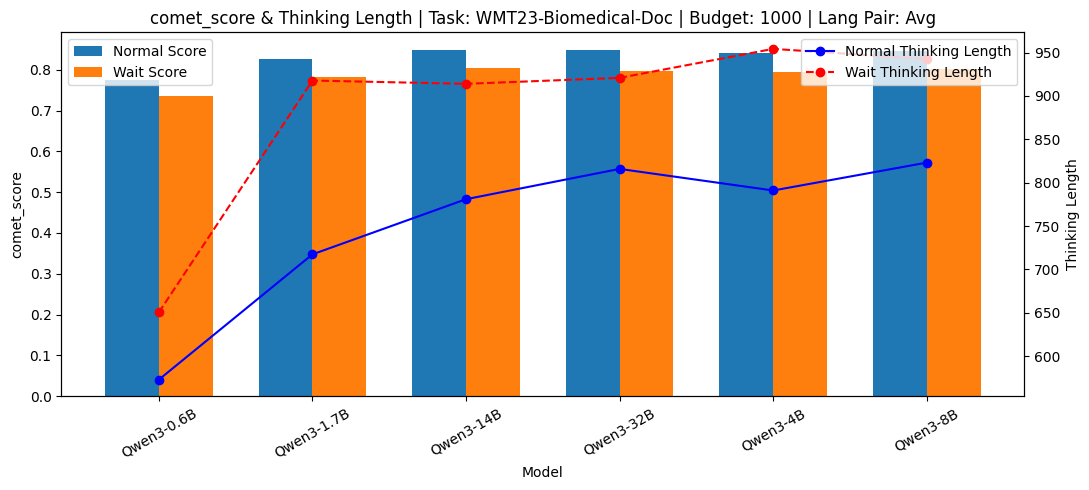

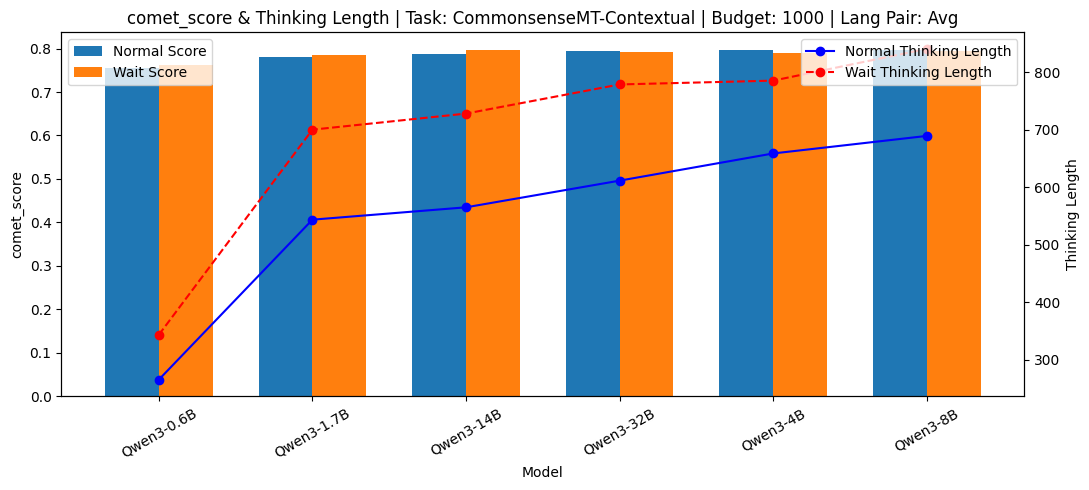

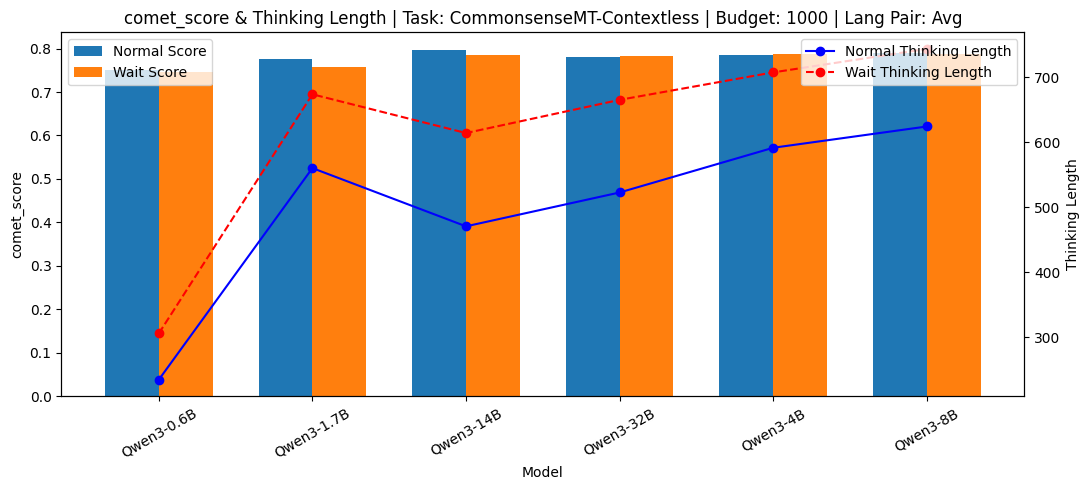

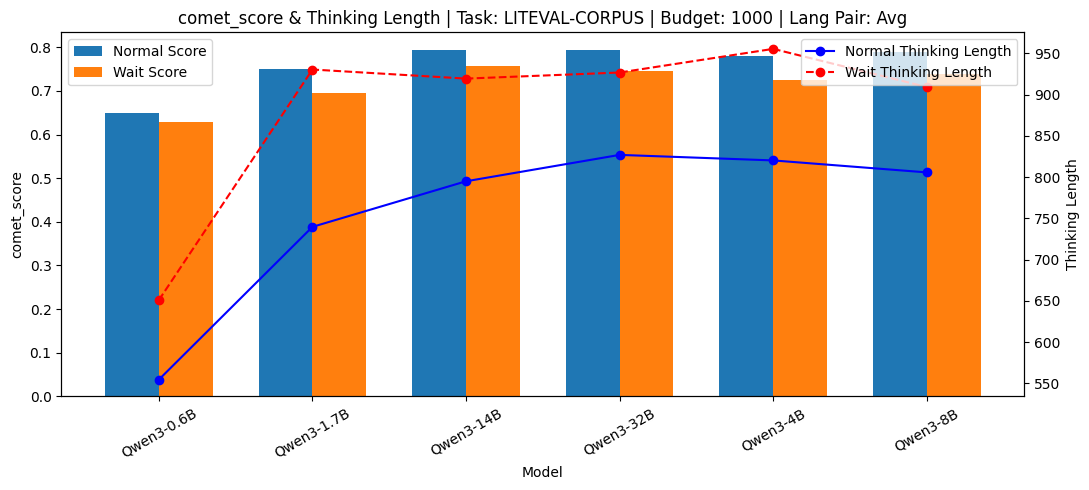

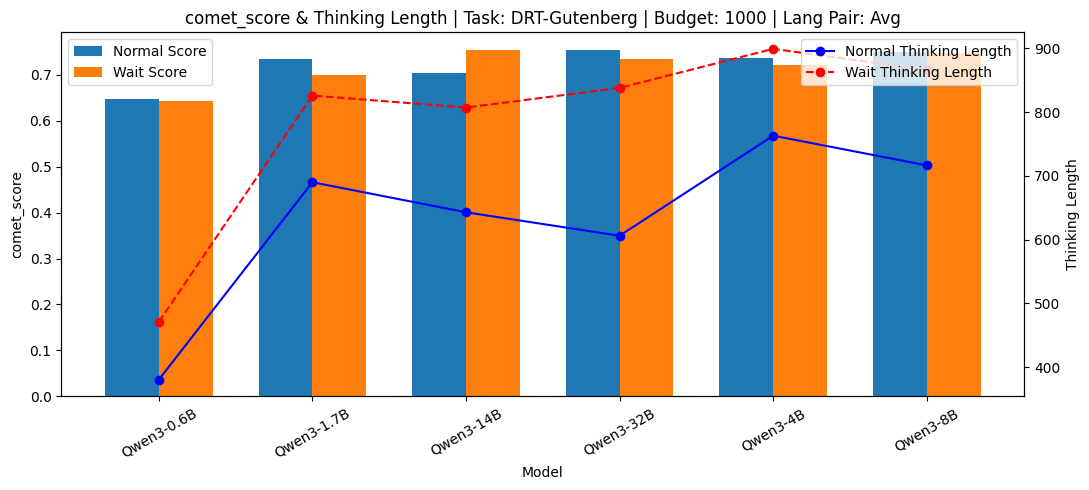

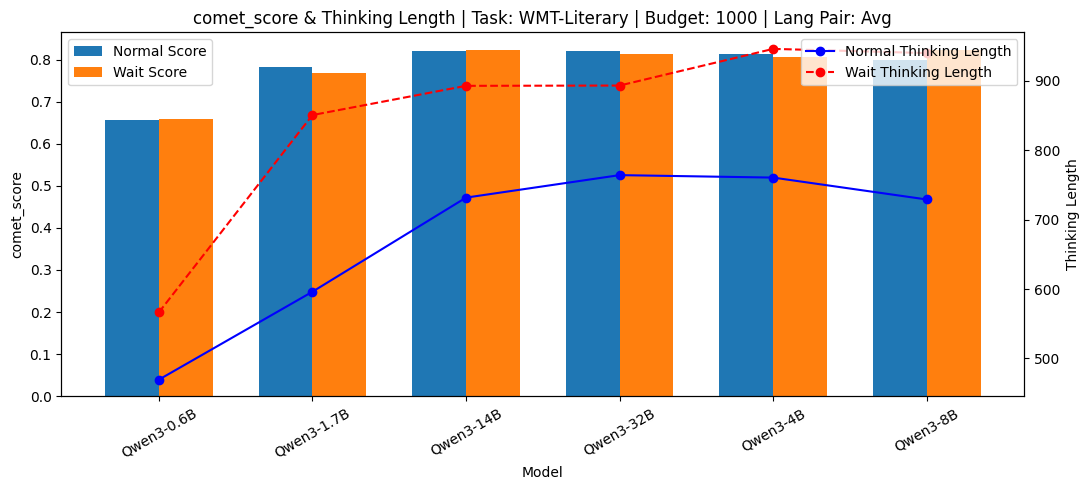

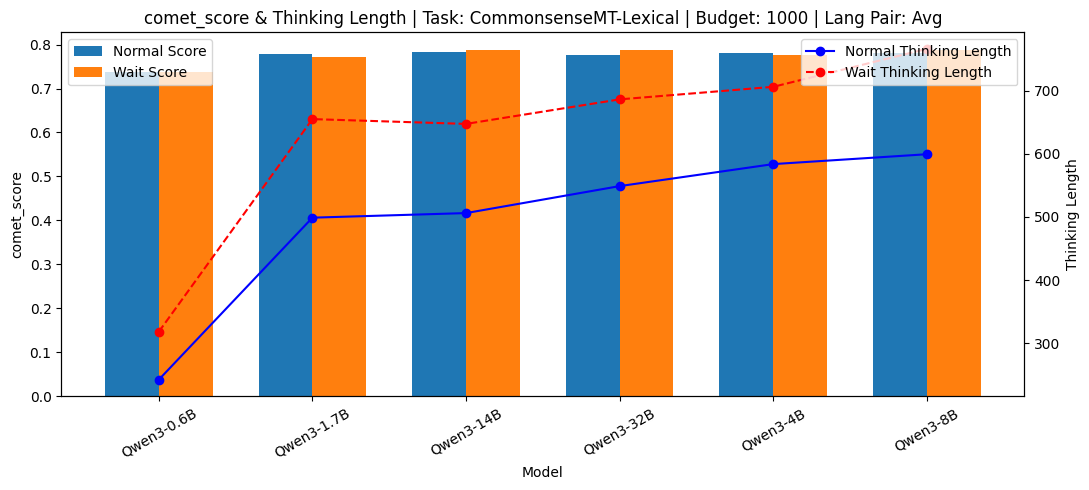

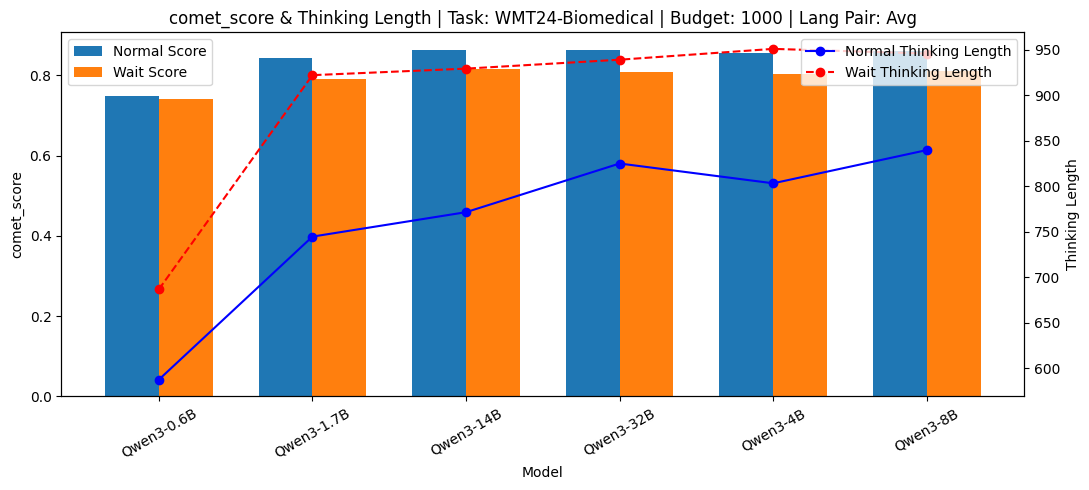

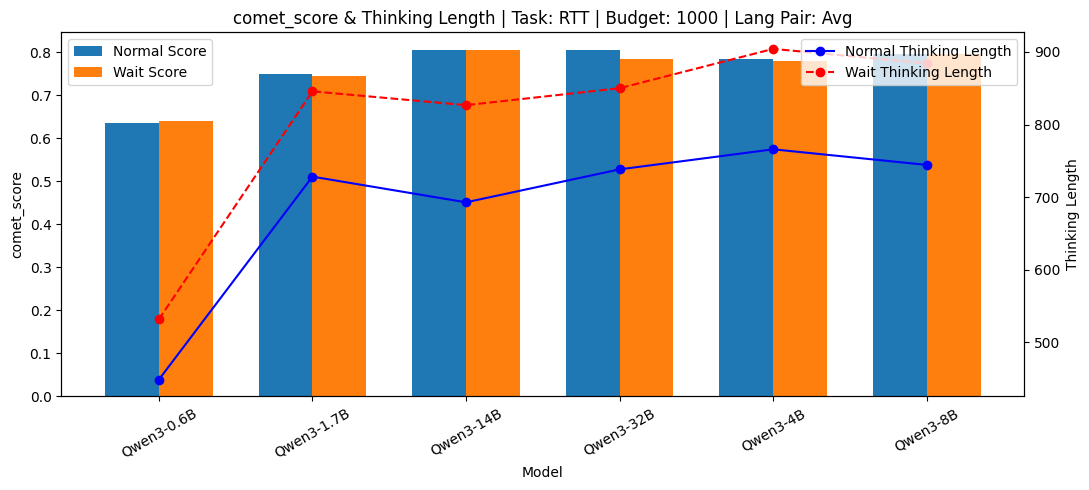

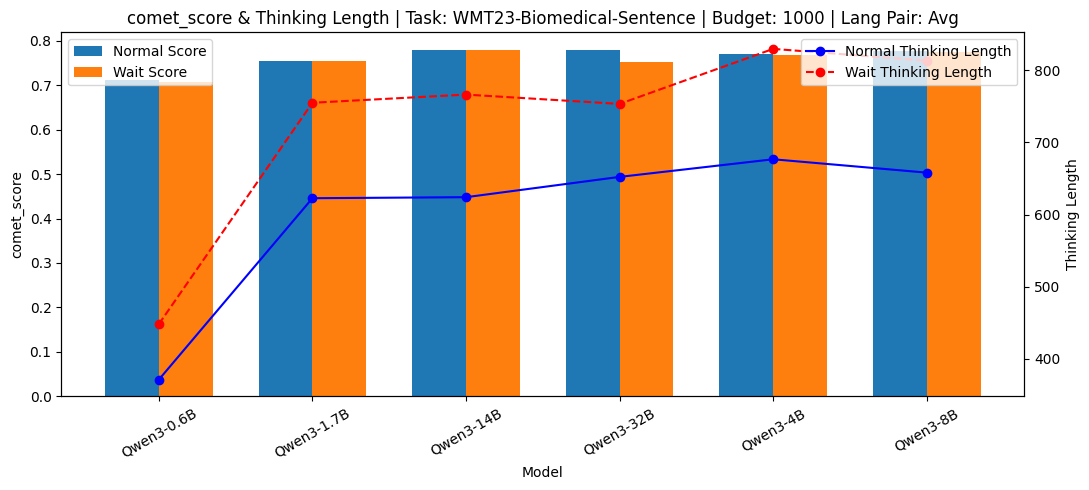

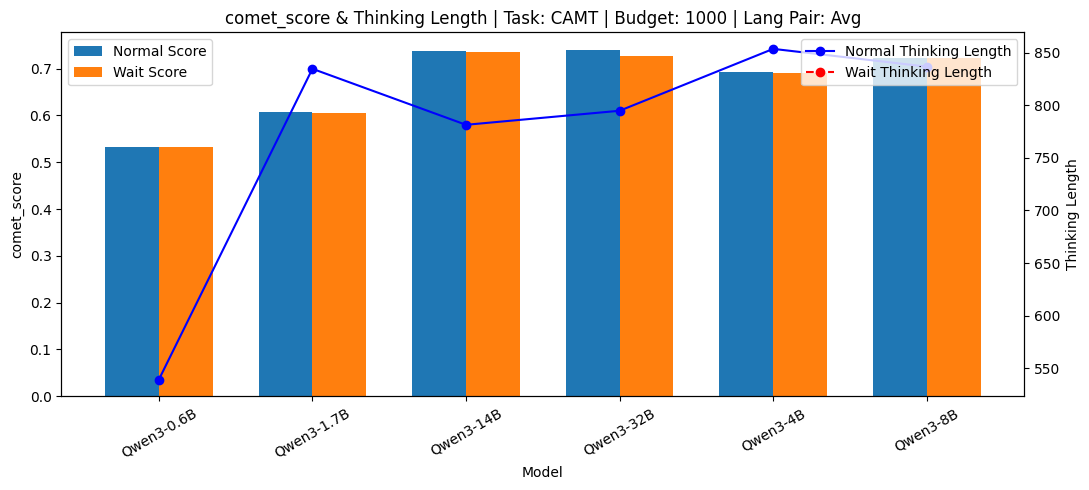

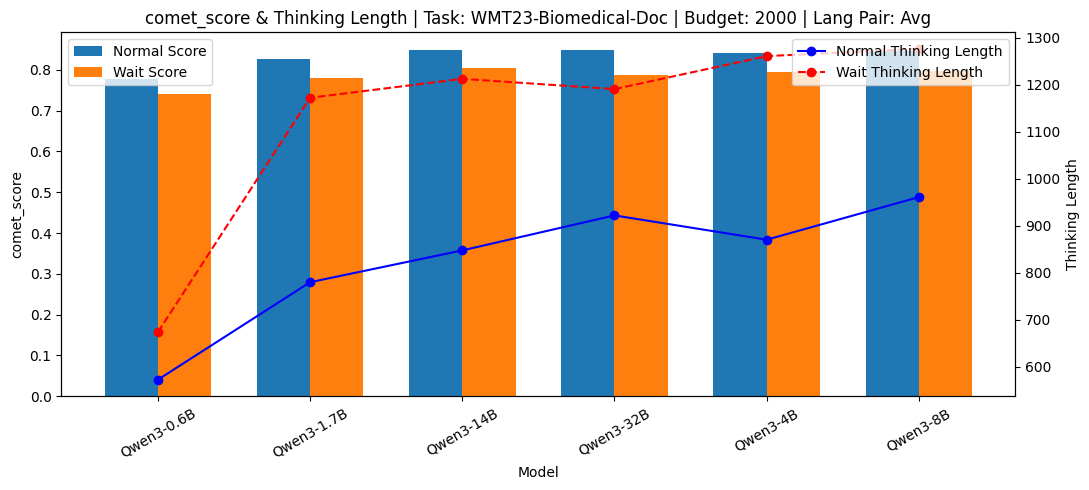

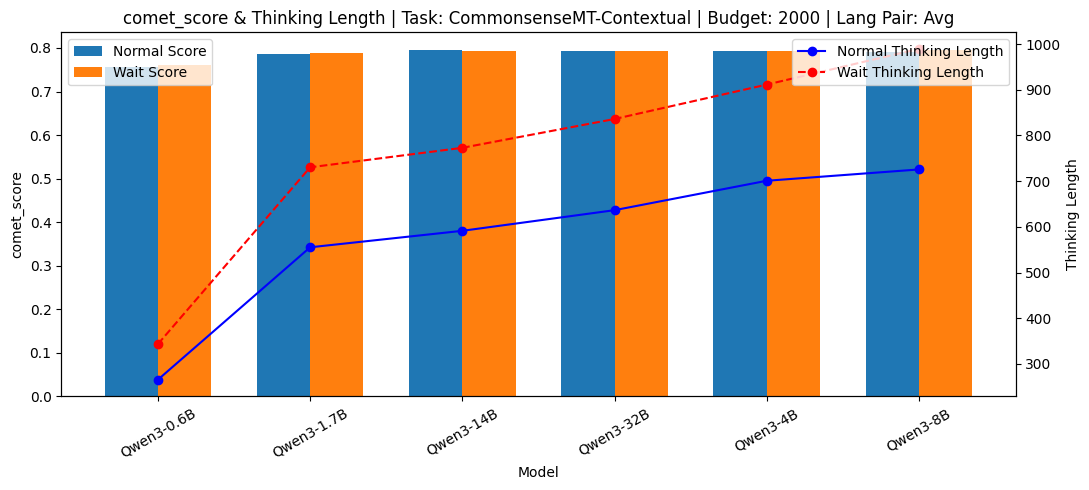

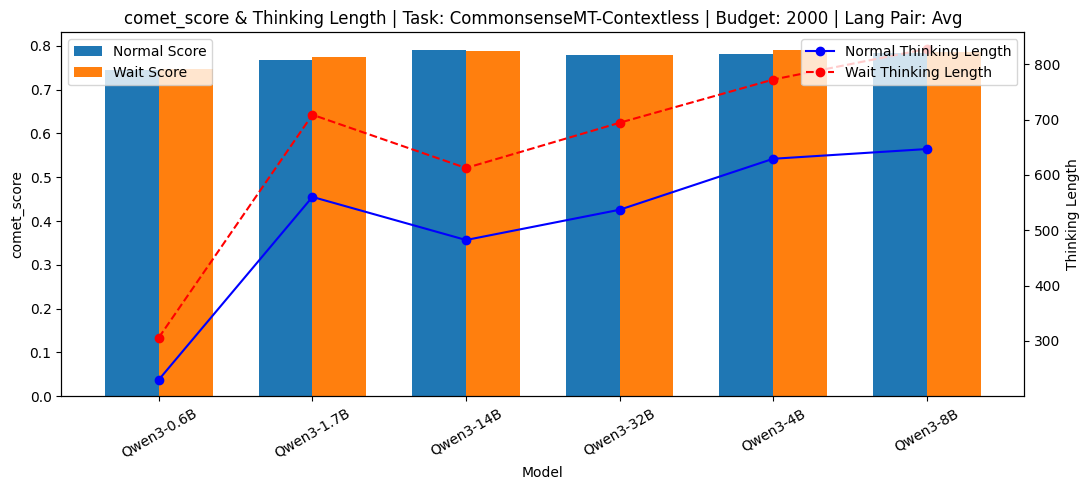

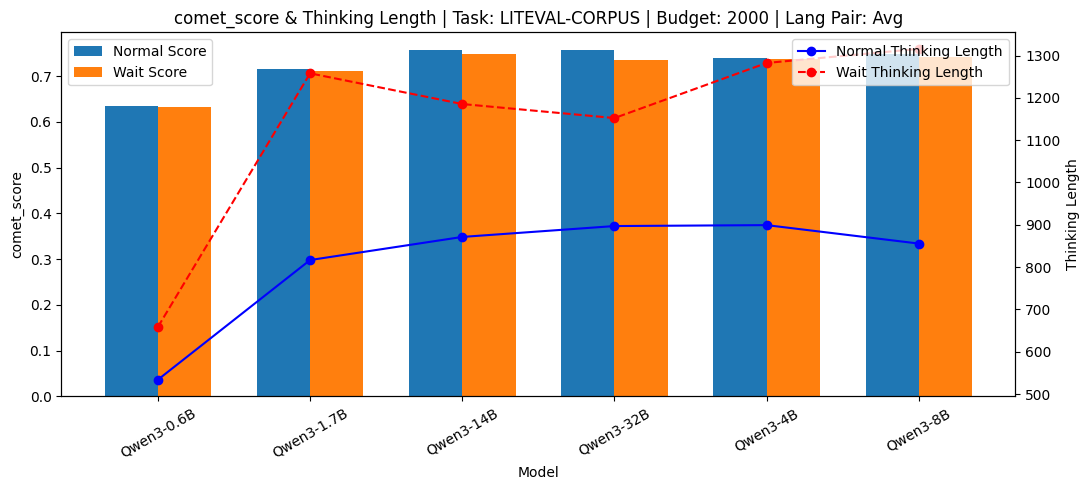

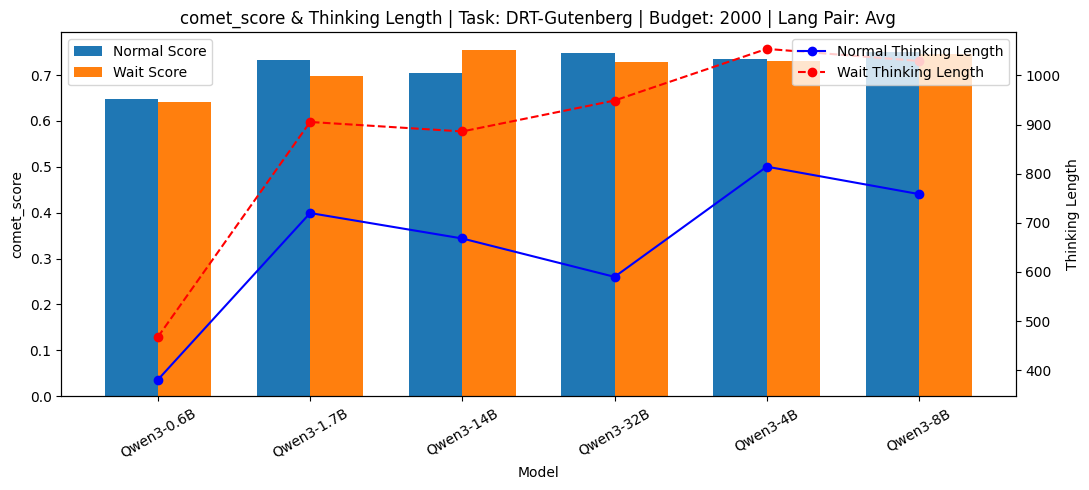

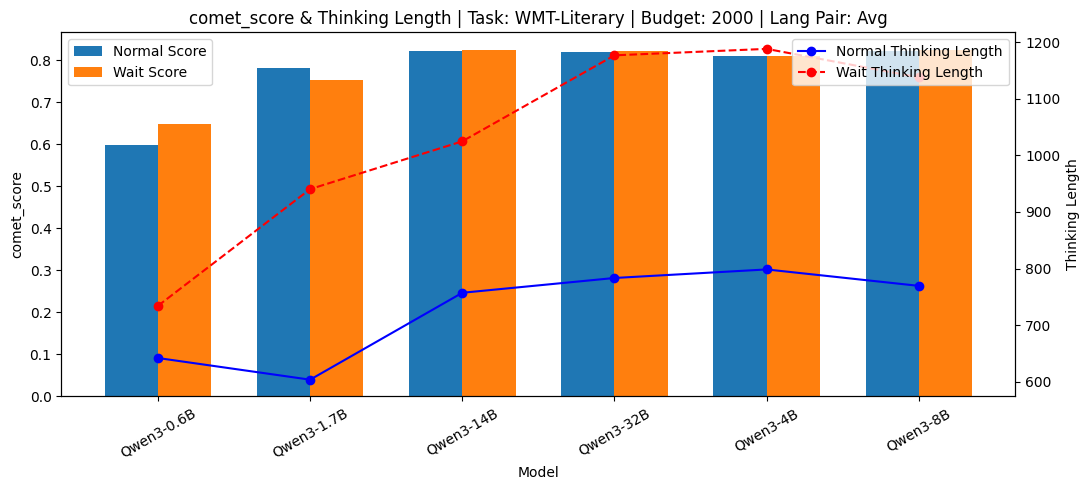

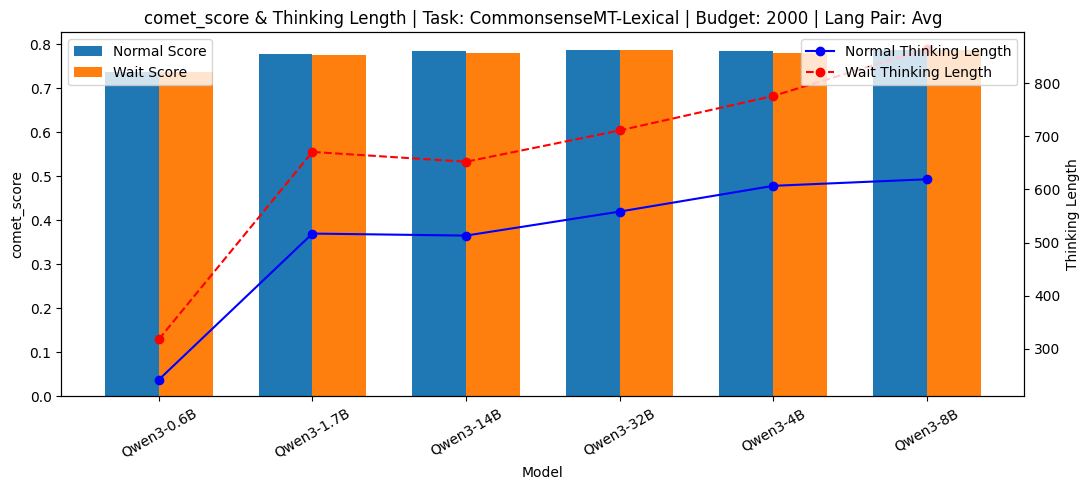

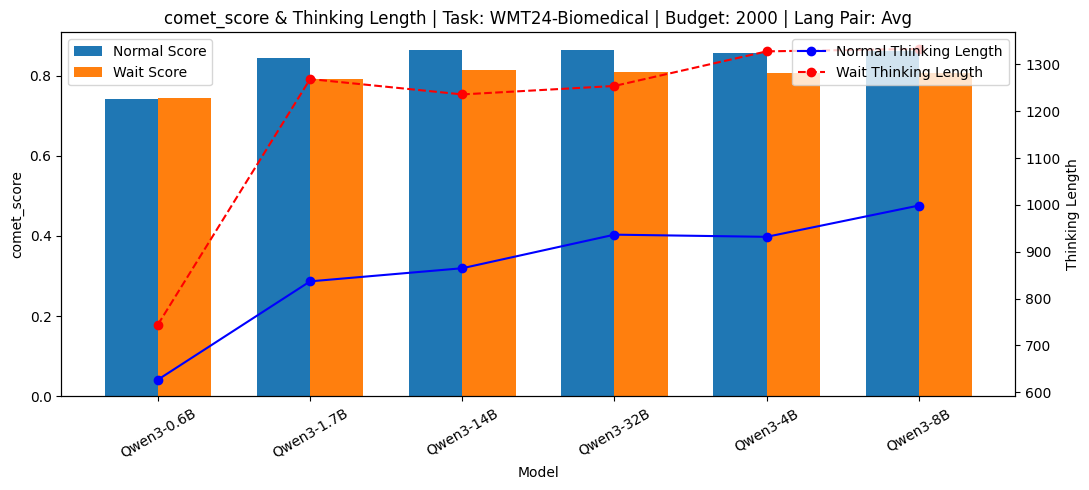

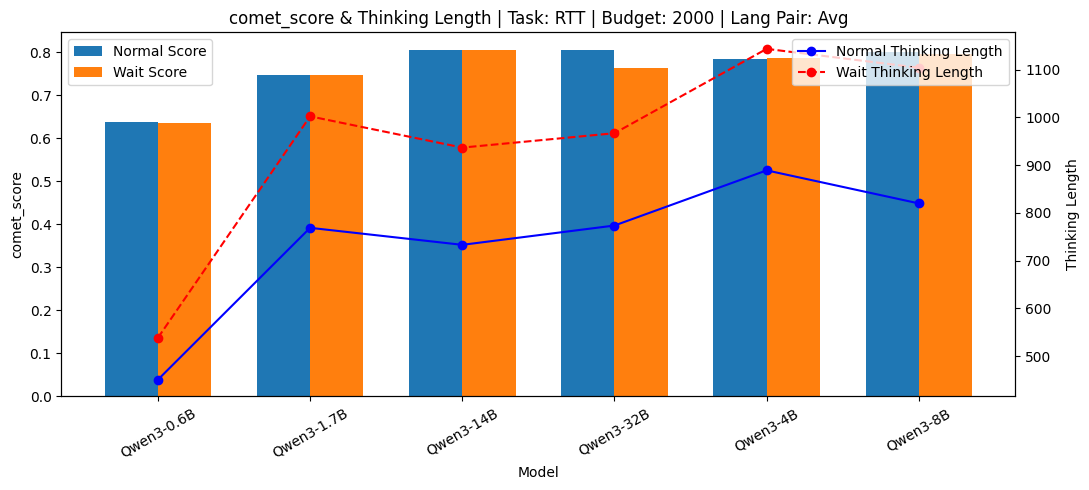

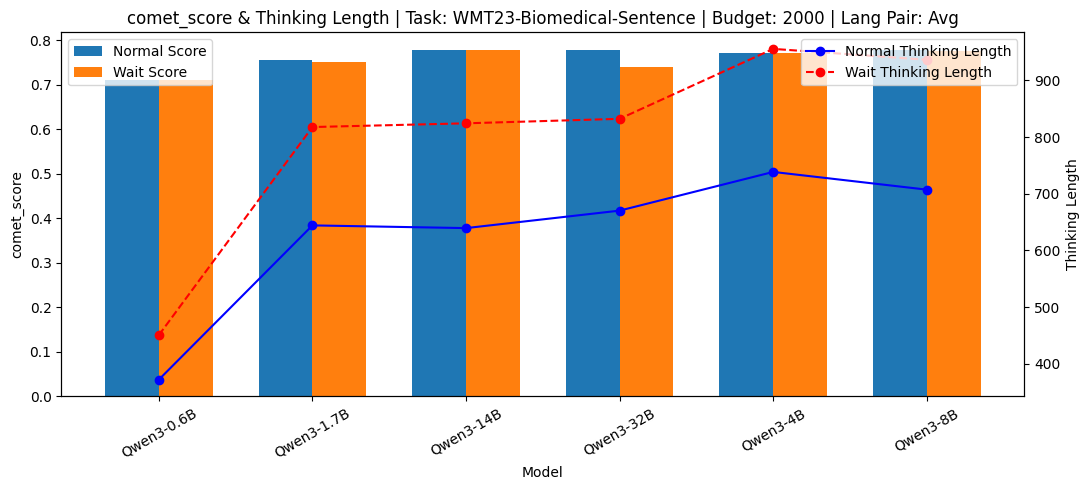

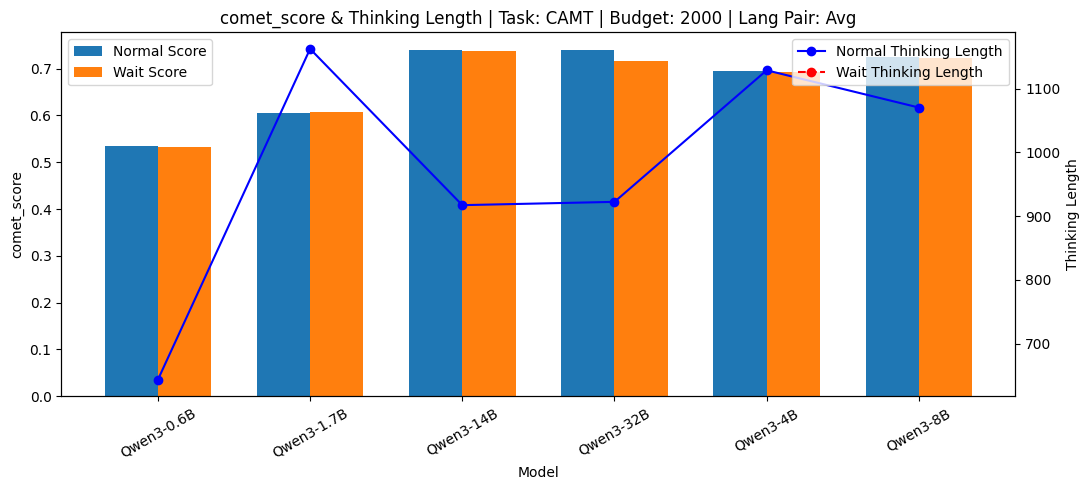

In [ ]:
metric = 'comet_score'
thinking_metric = 'thinking_length'
budgets = [1000, 2000]
merge_cols = ['model', 'task', 'lang_pair', 'budget']

# 取分数
df_score = dfs_by_metric[metric]
df_score_wait = dfs_by_metric_wait[metric]
df_score = df_score[df_score['budget'].isin(budgets)].rename(columns={'score': 'score_normal'})
df_score_wait = df_score_wait[df_score_wait['budget'].isin(budgets)].rename(columns={'score': 'score_wait'})

# 取思考长度
df_thinking = dfs_by_metric[thinking_metric]
df_thinking_wait = dfs_by_metric_wait[thinking_metric]
df_thinking = df_thinking[df_thinking['budget'].isin(budgets)].rename(columns={'score': 'think_normal'})
df_thinking_wait = df_thinking_wait[df_thinking_wait['budget'].isin(budgets)].rename(columns={'score': 'think_wait'})

# 合并
df_merged = pd.merge(df_score, df_score_wait[merge_cols + ['score_wait']], on=merge_cols, how='inner')
df_merged = pd.merge(df_merged, df_thinking[merge_cols + ['think_normal']], on=merge_cols, how='left')
df_merged = pd.merge(df_merged, df_thinking_wait[merge_cols + ['think_wait']], on=merge_cols, how='left')

for budget in budgets:
    budget_df = df_merged[df_merged['budget'] == budget]
    tasks = budget_df['task'].unique()
    for task in tasks:
        # lang_pair == "Avg"
        plot_df = budget_df[(budget_df['task'] == task) & (budget_df['lang_pair'] == 'Avg')]
        if plot_df.empty:
            continue
        fig, ax1 = plt.subplots(figsize=(11, 5))

        x = range(len(plot_df))
        models = plot_df['model']

        width = 0.35
        ax1.bar([i - width/2 for i in x], plot_df['score_normal'], width=width, label='Score (Normal)')
        ax1.bar([i + width/2 for i in x], plot_df['score_wait'], width=width, label='Score (Wait)')
        ax1.set_ylabel(f'{metric}')
        # ax1.set_xlabel('Model')
        ax1.set_xticks(x)
        ax1.set_xticklabels(models, rotation=30)
        ax1.legend(loc='upper left', framealpha=0.25)

        # y：thinking_length
        ax2 = ax1.twinx()
        ax2.plot(x, plot_df['think_normal'], marker='o', linestyle='-', color='blue', label='Thinking Length (Normal)')
        ax2.plot(x, plot_df['think_wait'], marker='o', linestyle='--', color='red', label='Thinking Length (Wait)')
        ax2.set_ylabel('Thinking Length (Tokens)')
        ax2.legend(loc='upper right', framealpha=0.25)

        plt.title(f'Task: {task} | Budget: {budget} | Lang Pair: Avg')
        plt.tight_layout()
        plt.show()
